# Iris Classification

In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

Loading the dataset from scikit-learn

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

Checking the loaded data in this format

In [4]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

It is better to convert data in the form of pandas dataframe for future analysis.

In [5]:
df1 = pd.DataFrame(iris.data, columns = iris.feature_names)
df2 = pd.DataFrame(iris.target, columns = ['target'])

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

df1 and df2 are two separate training and testing datasets. Creating a combined dataset df to visualize the relation in data as this is supervised training.

## Knowing the data

Exploring the data to get the basic idea. To also find if there are any false or null values to work on.

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


As there are no null values in the dataset so data do not require any pre-processing. 

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

The data is evenly divided in three classes of same size. The output labels are 0,1,2.

## Plotting the data

The best way to exlpore the data is to visualize it in the form of graphs.

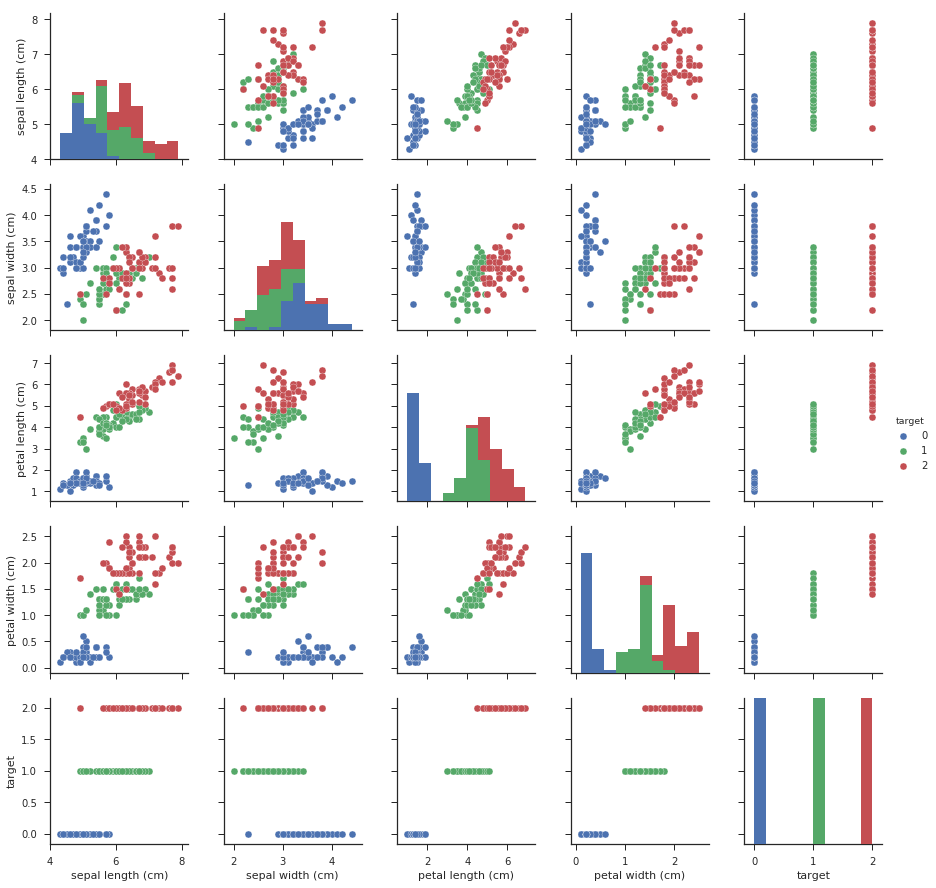

In [11]:
sns.set(style = "ticks")
sns.pairplot(df, hue = "target")
plt.show()

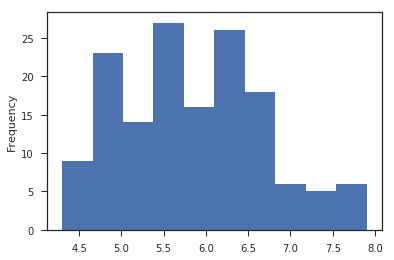

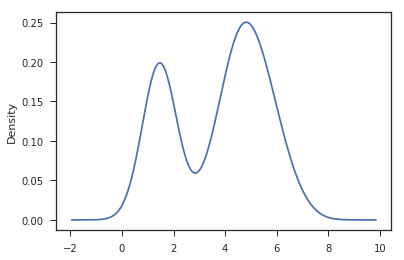

In [12]:
df['sepal length (cm)'].plot.hist()
plt.show()
df['petal length (cm)'].plot.kde()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

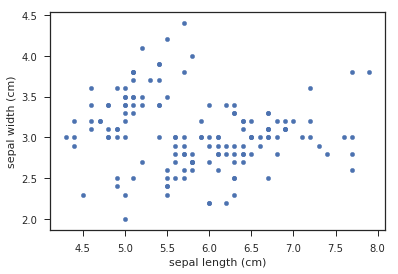

In [13]:
df.plot.scatter(x = 'sepal length (cm)',y = 'sepal width (cm)')
plt.show

This is very clean dataset in which there is no need of any pre-processing. From graphs it is clearly visible that target 0 is clearly sepearable from rest of the 2. This assures of high accuracy as one class is very distinguishable.

## Splitting the data into training, cross validation and testing dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, df2, train_size = 0.6,test_size = 0.4, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size = 0.5, test_size = 0.5, random_state = 1)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print (X_val.shape, y_val.shape)

(90, 4) (90, 1)
(30, 4) (30, 1)
(30, 4) (30, 1)


## Training and Testing (Different Models)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train.values.ravel())

knn_score = knn.score(X_val, y_val)

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())

gnb_score = gnb.score(X_val, y_val)

In [18]:
from sklearn import svm
svc = svm.SVC(gamma ='scale')
svc.fit(X_train, y_train.values.ravel())

svc_score = svc.score(X_val, y_val)

In [19]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train.values.ravel())

dtc_score = dtc.score(X_val, y_val)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rfc.fit(X_train, y_train.values.ravel())

rfc_score = rfc.score(X_val, y_val)

In [21]:
models = pd.DataFrame({'Model': ['KNN','Naive Bayes','SVC','Decision Tree','Random Forest'],
    'Score': [knn_score, gnb_score, svc_score, dtc_score, rfc_score]})
print(models.sort_values(by ='Score', ascending = False))

           Model     Score
2            SVC  1.000000
0            KNN  0.966667
1    Naive Bayes  0.966667
3  Decision Tree  0.966667
4  Random Forest  0.966667


Now SVC and KNN will be studied in the detail

## Tuning and analyzing the selected model

/home/anchit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1310: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 82 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


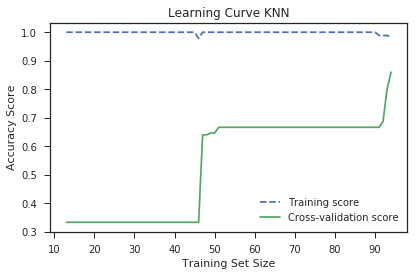

In [19]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=3), 
                                                        df1,df2,cv=10,scoring='accuracy',n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 0.7, 100))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.title("Learning Curve KNN")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

/home/anchit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1310: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 73 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


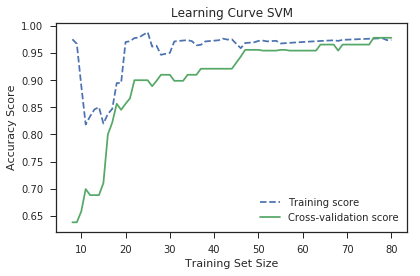

In [20]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(gamma ='scale'), 
                                                        X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1,
                                                        train_sizes=np.linspace(0.1,1, 100))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.title("Learning Curve SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Final step

Testing the model on testing data

In [21]:
from sklearn import svm
svc = svm.SVC(gamma ='scale')
svc.fit(X_train, y_train)

svc_score = svc.score(X_test, y_test)
print(svc_score)

0.9666666666666667


/home/anchit/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


This is score with training on 60% of data. With increase in training size the reaches to 97%